In [1]:
import os
from os.path import isfile, join

import re

import numpy as np
import pandas as pd
import seaborn as sns

In [1]:
path = '../data/graphs/kw34/results'

def build_df_from_csvs(path: str) -> pd.DataFrame:
    files = os.listdir(path)
    df = pd.DataFrame()

    for current_file in files:
    # current_file = files[0]
        df_tmp = pd.read_csv(join(path, current_file), delimiter=',\t')
        
        prefix = [re.findall(r'(\w+?)(\d+\.\d+|\d+)', identifier)[0] for identifier in current_file.split('-')[0].split('_')]
        for cn, cv in prefix:
            df_tmp[cn] = pd.to_numeric(cv)

        suffix = current_file.split('-')[2].split('_')
        if len(suffix) == 3:
            suffix[1] = '{}_{}'.format(suffix[1], suffix[2])
            suffix.pop(2)
        suffix[1] = suffix[1].split('.')[0]
        df_tmp['Sampling'] = suffix[0]
        df_tmp['Clustering'] = suffix[1]
        
        df = pd.concat([df, df_tmp])

    # postprocess
    df['jsd'] = df['jsd'].apply(lambda x: 1 - x)
    df.rename(columns = {'jsd':'ijsd'}, inplace = True)

    return df

df = build_df_from_csvs(path)
df.head()

NameError: name 'pd' is not defined

In [3]:
df['Clustering'] = pd.Categorical(df['Clustering'], ['cc_split', 'cc_nosplit', 'ccc', 'cw', 'lm'])
df = df.sort_values('Clustering')
df.head()

sns.set_theme(style="darkgrid")

checkpoints = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 2000,  3000, 4000, 5000]


In [4]:
df_clustering_all = pd.melt(df, id_vars=['Checkpoint', 'Clustering'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
df_clustering_all.head()

,Checkpoint,Clustering,Measure,Performance
0,30,cc_split,ari,0.465320
1,400,cc_split,ari,0.678551
2,500,cc_split,ari,0.821832
3,1000,cc_split,ari,0.793693
4,2000,cc_split,ari,0.730706


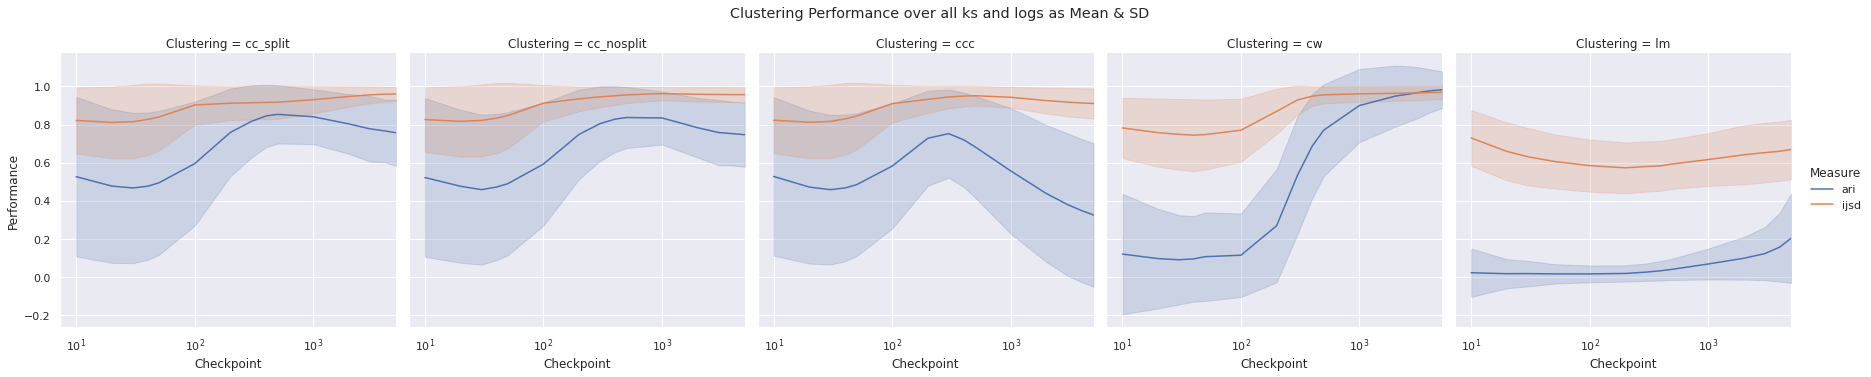

In [5]:
rp = sns.relplot(data=df_clustering_all,
    x='Checkpoint', y='Performance', hue='Measure', col='Clustering', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.85)
rp.fig.suptitle('Clustering Performance over all ks and logs as Mean & SD')
rp.set(xscale='log')
rp.set(xlim=[0, 5000])

In [6]:
del(df_clustering_all)

# rp = sns.relplot(data=df_pr,
#     x='Checkpoint', y='Performance', hue='k', col='Measure', ci=None, kind='line')

# rp.fig.subplots_adjust(top=0.9)
# rp.fig.suptitle('Page-Rank Performance as Mean & SD')
# rp.set(xscale='log')
# rp.set(xlim=[10, 5000])

# rp = sns.relplot(data=df_pr,
#     x='Checkpoint', y='Performance', hue='log', col='Measure', ci=None, kind='line')

# rp.fig.subplots_adjust(top=0.9)
# rp.fig.suptitle('Page-Rank Performance as Mean & SD')
# rp.set(xscale='log')
# rp.set(xlim=[10, 5000])



In [8]:
df_cc_ns = df.query('Clustering == "cc_split"')
df_cc_ns.head()

,Checkpoint,bootstrap_jsd,gambette,cluster_number,ijsd,ari,n,k,log,Sampling,Clustering
2,30,0.064915,0.954460,8,0.879816,0.465320,100,10,0.1,pagerank,cc_split
8,400,0.173594,0.049294,37,0.775130,0.678551,100,7,0.9,randomsampling,cc_split
9,500,0.177044,0.038543,35,0.792966,0.821832,100,7,0.9,randomsampling,cc_split
10,1000,0.172170,0.026650,35,0.768347,0.793693,100,7,0.9,randomsampling,cc_split
11,2000,0.139736,0.009576,28,0.807838,0.730706,100,7,0.9,randomsampling,cc_split


In [10]:
df_cc_ns_ov = pd.melt(df_cc_ns, id_vars=['Checkpoint', 'k', 'log'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
df_cc_ns_ov.head()

,Checkpoint,k,log,Measure,Performance
0,30,10,0.1,ari,0.465320
1,400,7,0.9,ari,0.678551
2,500,7,0.9,ari,0.821832
3,1000,7,0.9,ari,0.793693
4,2000,7,0.9,ari,0.730706


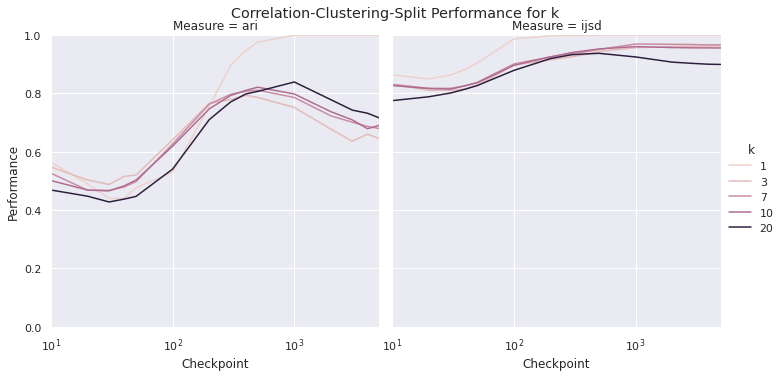

In [19]:
rp = sns.relplot(data=df_cc_ns_ov,
    x='Checkpoint', y='Performance', hue='k', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Correlation-Clustering-Split Performance for k')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])

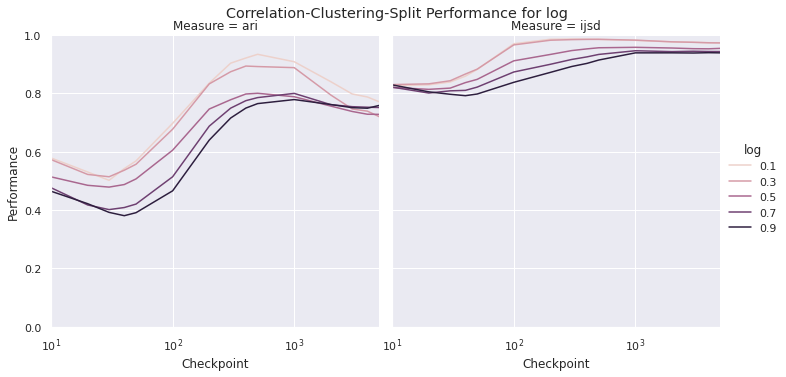

In [20]:
rp = sns.relplot(data=df_cc_ns_ov,
    x='Checkpoint', y='Performance', hue='log', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Correlation-Clustering-Split Performance for log')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])


In [21]:
df_cc_ns = df.query('Clustering == "cc_nosplit"')
df_cc_ns_ov = pd.melt(df_cc_ns, id_vars=['Checkpoint', 'k', 'log'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
df_cc_ns_ov.head()

,Checkpoint,k,log,Measure,Performance
0,100,1,0.9,ari,0.000000
1,400,7,0.3,ari,0.566728
2,500,7,0.3,ari,0.656173
3,50,1,0.9,ari,0.000000
4,10,1,0.3,ari,1.000000


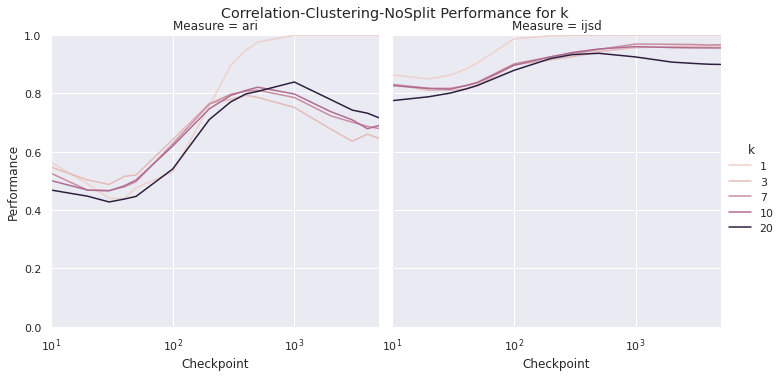

In [22]:
rp = sns.relplot(data=df_cc_ns_ov,
    x='Checkpoint', y='Performance', hue='k', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Correlation-Clustering-NoSplit Performance for k')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])


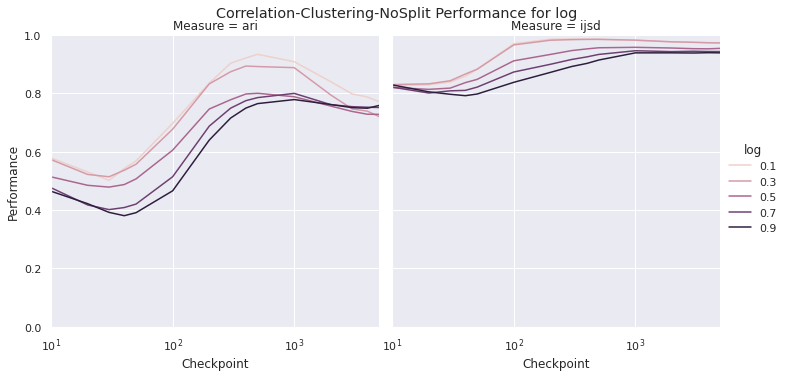

In [23]:
rp = sns.relplot(data=df_cc_ns_ov,
    x='Checkpoint', y='Performance', hue='log', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Correlation-Clustering-NoSplit Performance for log')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])


In [24]:
del(df_cc_ns_ov)


In [31]:
del(df_cc_ns)
del(df_cc_ov)

In [32]:
df_ccc = df.query('Clustering == "ccc"')
df_cc_ov = pd.melt(df_ccc, id_vars=['Checkpoint', 'k', 'log'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
df_cc_ov.head()

,Checkpoint,k,log,Measure,Performance
0,50,7,0.5,ari,0.760503
1,40,3,0.5,ari,0.844368
2,50,3,0.5,ari,0.862555
3,500,10,0.7,ari,0.292948
4,400,10,0.7,ari,0.411430


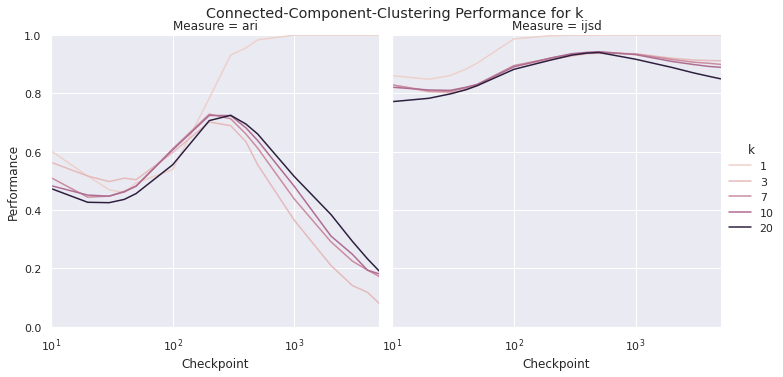

In [33]:
rp = sns.relplot(data=df_cc_ov,
    x='Checkpoint', y='Performance', hue='k', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Connected-Component-Clustering Performance for k')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])


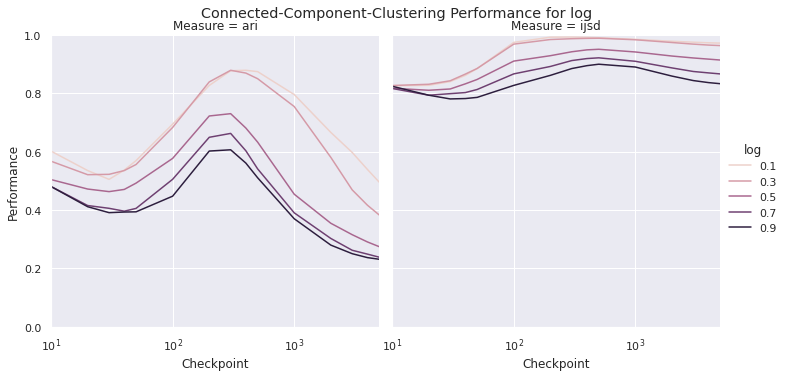

In [34]:
rp = sns.relplot(data=df_cc_ov,
    x='Checkpoint', y='Performance', hue='log', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Connected-Component-Clustering Performance for log')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])


In [ ]:
del(df_cc_ov)
del(df_ccc)

In [ ]:
df_cc_ns = df.query('Clustering == "cw"')
df_cc_ns_ov = pd.melt(df_cc_ns, id_vars=['Checkpoint', 'k', 'log'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
df_cc_ns_ov.head()

In [ ]:
rp = sns.relplot(data=df_cc_ov,
    x='Checkpoint', y='Performance', hue='k', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Chinese-Whispers-Clustering Performance for k')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])


In [ ]:
rp = sns.relplot(data=df_cc_ov,
    x='Checkpoint', y='Performance', hue='log', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Chinese-Whispers-Clustering Performance for log')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])
